used tutorial : https://towardsdatascience.com/extract-features-of-music-75a3f9bc265d

In [2]:
!pip install librosa

You should consider upgrading via the 'C:\Users\maaik\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [3]:
# First of all, we take a look at the different audio features that can be extracted from Librosa to get a better understanding on the features we can extract. 
# Herefor we take 1 audiofile as a sample.

In [4]:
import librosa
audio_path = 'Tfiles\D\D3_TM.wav'
x , sr = librosa.load(audio_path)
print(type(x), type(sr))

<class 'numpy.ndarray'> <class 'int'>


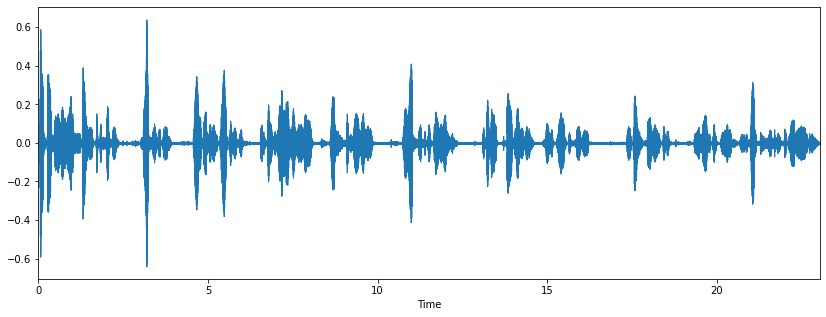

In [5]:
# display waveform
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

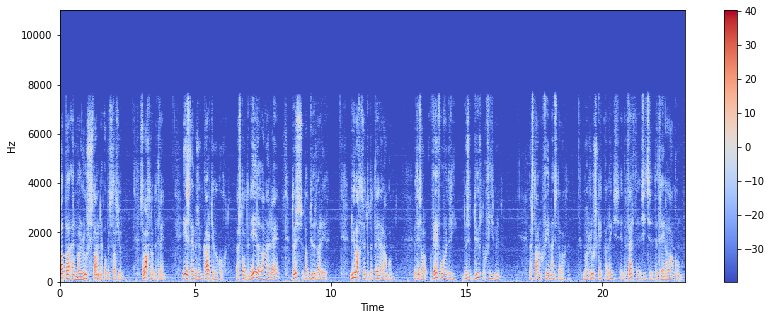

In [22]:
#display Spectrogram
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') 
plt.colorbar() 


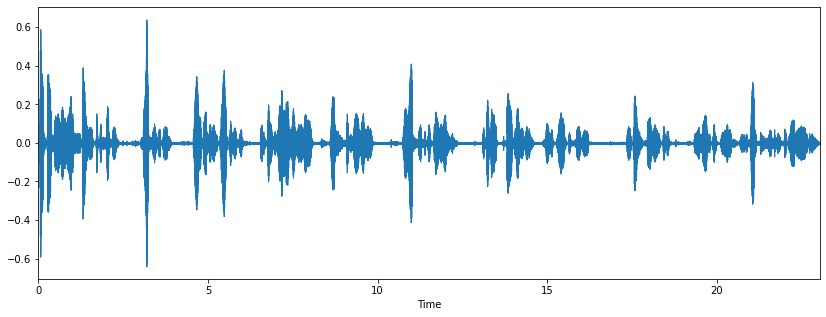

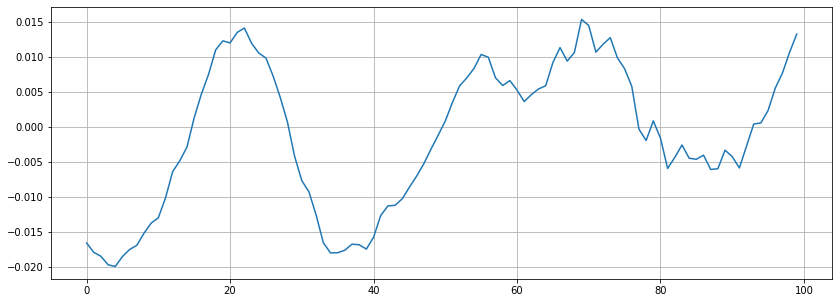

In [7]:
x, sr = librosa.load(audio_path)
#Plot the signal:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

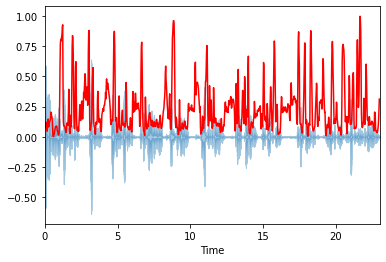

In [8]:
#spectral centroid -- centre of mass -- weighted mean of the frequencies present in the sound
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape
# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

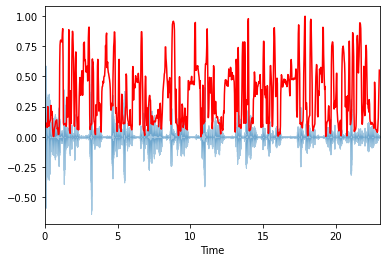

In [9]:
# display spectral rolloff
spectral_rolloff = librosa.feature.spectral_rolloff(x, sr=sr)[0]
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

(20, 992)


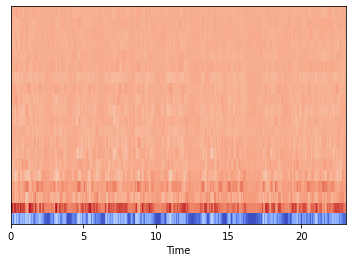

In [10]:
# print mfcc's
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)
#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

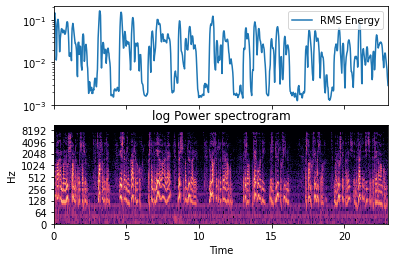

In [35]:
# prints rms
y , sr = librosa.load(audio_path)
rms=librosa.feature.rms(y=y)
fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(rms)
ax[0].semilogy(times, rms[0], label='RMS Energy')
ax[0].set(xticks=[])
ax[0].legend()
ax[0].label_outer()
S, phase = librosa.magphase(librosa.stft(y))
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram')
S = librosa.magphase(librosa.stft(y, window=np.ones, center=False))[0]
librosa.feature.rms(S=S)
plt.show()

[Text(0.5, 1.0, 'Chromagram')]

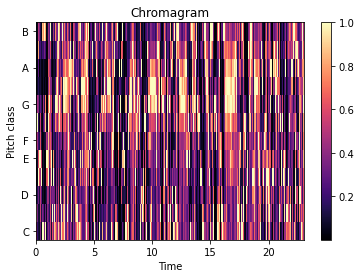

In [36]:
# print chroma_stft
# Compute a chromagram from a waveform or power spectrogram.
chroma = librosa.feature.chroma_stft(y=y, sr=sr)
fig, ax = plt.subplots()
img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='Chromagram')

In [11]:
## extract the audio features of all audio files to a csv

In [12]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import csv
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
#Keras
import keras

Using TensorFlow backend.


In [13]:
# creating header for csv file

header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

In [15]:

# open each audio file and write librosa features to the csv-file.

file = open('MusicFeaturesdata.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
genres = 'D G H L N V'.split()
for g in genres:
    for filename in os.listdir(f'./Tfiles/{g}'):
        songname = f'./Tfiles/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=30)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        rmse = librosa.feature.rms(y=y)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += f' {g}'
        file = open('MusicFeaturesdata.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

In [16]:
## Discover the csv we just created

features_df = pd.read_csv('MusicFeaturesdata.csv')
features_df.describe()

chroma_stft        rmse  spectral_centroid  spectral_bandwidth  \
count   180.000000  180.000000         180.000000          180.000000   
mean      0.400692    0.041483        1600.034248         1689.076514   
std       0.052757    0.034140         302.282594          169.030441   
min       0.290601    0.005375        1052.794856         1363.914621   
25%       0.357946    0.019321        1382.293328         1568.440661   
50%       0.404213    0.029382        1545.111911         1665.403499   
75%       0.434622    0.055544        1756.185793         1799.546207   
max       0.558558    0.215828        2703.179320         2141.562588   

           rolloff  zero_crossing_rate       mfcc1       mfcc2       mfcc3  \
count   180.000000          180.000000  180.000000  180.000000  180.000000   
mean   3295.461039            0.075191 -352.303343  110.406559   -5.959727   
std     588.379127            0.025722   59.823918   17.184999   16.680779   
min    2169.453548            0.027892 -508.605286   60.225502  -67.969421   
25%    2885.824974            0.059341 -392.690384  100.059244  -16.935972   
50%    3202.243136            0.069602 -361.368362  112.525017   -5.098558   
75%    3698.303357            0.089750 -314.526360  122.183559    4.535585   
max    5308.284568            0.173772 -185.238358  152.115128   36.028805   

            mfcc4  ...      mfcc11      mfcc12      mfcc13      mfcc14  \
count  180.000000  ...  180.000000  180.000000  180.000000  180.000000   
mean    38.868329  ...   -1.202552   -4.576008    3.222807   -6.419326   
std     12.587194  ...    4.763963    4.031454    4.384753    4.349311   
min     -2.866397  ...  -12.254006  -16.497469   -8.957102  -19.569921   
25%     30.686273  ...   -4.562218   -6.926528    0.401205   -9.511013   
50%     39.572336  ...   -1.737568   -4.591496    3.098634   -6.380535   
75%     48.209230  ...    1.521088   -1.903391    6.679124   -3.593001   
max     76.969658  ...   16.751360    5.589539   13.932119    4.115695   

           mfcc15      mfcc16      mfcc17      mfcc18      mfcc19      mfcc20  
count  180.000000  180.000000  180.000000  180.000000  180.000000  180.000000  
mean     5.197476   -5.517480    0.320453   -0.677071   -0.180443   -0.232138  
std      4.584588    4.253633    4.290389    3.250084    3.227349    4.127528  
min     -8.136802  -15.930111   -8.220355   -9.083311   -8.265202   -7.773803  
25%      1.852010   -8.351650   -2.742956   -2.933607   -2.243863   -2.706295  
50%      4.976749   -5.149606   -0.121960   -0.976191   -0.237137   -1.013360  
75%      8.268052   -2.582221    2.711357    1.708545    1.912039    1.877857  
max     16.214825    6.295963   15.506280    8.002700    8.398640   16.074244  

[8 rows x 26 columns]

In [17]:
features_df.head(10)

filename  chroma_stft      rmse  spectral_centroid  spectral_bandwidth  \
0  D11_TM.wav     0.412712  0.017674        1983.832097         1696.579032   
1  D12_TM.wav     0.414867  0.025373        1454.382630         1651.406693   
2  D13_TM.wav     0.357672  0.037677        1462.291155         1611.532182   
3  D14_TM.wav     0.414527  0.060058        1136.769876         1560.279907   
4  D15_TM.wav     0.456606  0.040364        1237.186694         1425.352050   
5  D17_TM.wav     0.369913  0.083761        1052.794856         1392.525920   
6  D18_TM.wav     0.423646  0.012670        1538.049868         1671.040182   
7  D19_TM.wav     0.382964  0.095235        1425.324637         1660.273955   
8  D20_TM.wav     0.340276  0.025475        1510.425256         1653.308359   
9  D21_TM.wav     0.382552  0.013599        1137.708886         1376.565122   

       rolloff  zero_crossing_rate       mfcc1       mfcc2      mfcc3  ...  \
0  3853.926696            0.119679 -354.343597  113.308159 -41.585381  ...   
1  3208.913929            0.062853 -377.689850  118.675743   3.378528  ...   
2  2926.132306            0.063839 -393.337311  102.085770  -3.572047  ...   
3  2257.003019            0.042351 -361.445160  118.190163  22.087654  ...   
4  2509.563195            0.055511 -334.161072  146.779846 -10.002002  ...   
5  2169.453548            0.039383 -295.836060  128.717514  -0.413767  ...   
6  3292.705089            0.066862 -398.458313  122.093071 -21.739864  ...   
7  2942.532207            0.061529 -276.600098  105.735291   6.530799  ...   
8  3049.398227            0.070158 -365.181732  118.142998  -2.034796  ...   
9  2412.743744            0.045466 -418.041321  152.115128 -20.824890  ...   

      mfcc12    mfcc13     mfcc14     mfcc15    mfcc16    mfcc17    mfcc18  \
0  -8.239863  8.881474  -5.271297   4.814303 -6.834187  2.742690 -0.968525   
1   2.967209  0.054702   0.500937  11.257287 -5.796531  0.581473 -0.285335   
2  -6.781964  1.398337 -12.372192   5.852800 -8.212138 -4.382644 -2.375372   
3  -5.692695  1.720981  -8.522771   7.893878 -8.895609 -5.348538 -1.063221   
4 -10.034507  1.451928   2.209690  -1.323291 -2.843013  0.511013 -0.644464   
5  -5.106120 -0.943597  -2.184744   0.775965 -6.111443 -2.886848  1.953019   
6  -6.870670  4.706126  -7.683343   8.482469 -4.008993 -3.133700 -1.042860   
7  -2.943314  3.698916  -6.564411   1.378101  6.295963  3.695678  2.702902   
8  -4.747442  3.570675  -1.358911   2.701395 -8.986879  3.888176 -4.274721   
9  -2.348392  8.405567  -3.966532  -2.413685 -9.660492 -4.982818 -3.373912   

     mfcc19    mfcc20  label  
0 -0.898997 -2.506209      D  
1  0.780839  0.298647      D  
2 -5.097301 -0.492338      D  
3 -4.115649 -1.000137      D  
4 -1.082109  0.176491      D  
5 -0.751055 -1.075408      D  
6 -4.918341  3.237752      D  
7 -1.168892 -7.773803      D  
8 -2.852235  0.523048      D  
9 -6.499879 -0.475485      D  

[10 rows x 28 columns]